In [3]:
a=5
a

5

In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split 

from tensorflow.keras.utils import to_categorical 

from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

from tensorflow.keras.optimizers import Adam


In [4]:
dataset=pd.read_csv("fer2013.csv")
dataset

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


C:\Users\Mahika\AppData\Local\Temp\ipykernel_20560\870180081.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_name,y=emotion_count,palette="viridis",ax=ax)


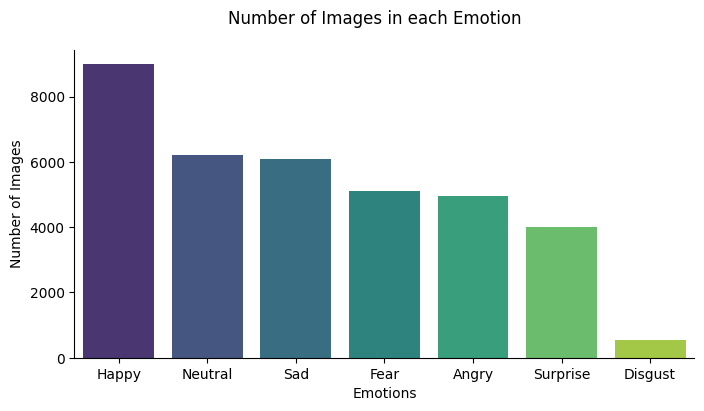

In [5]:
#Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
emotion_mapping = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# We  have the emotion_mapping dictionary
emotion_counts = dataset.emotion.value_counts()

# Access emotion counts with corresponding names
emotion_name = [emotion_mapping[label] for label in emotion_counts.index]
emotion_count = [count for count in emotion_counts.values]

# Create a bar plot using Matplotlib & Seaborn
fig, ax = plt.subplots(1,1,figsize=(8,4))
#sns.barplot(x=data.emotion.value_counts().keys() ,y=data.emotion.value_counts().values,palette="viridis",ax=ax)
sns.barplot(x=emotion_name,y=emotion_count,palette="viridis",ax=ax)
plt.xlabel("Emotions")
plt.ylabel("Number of Images")
ax.spines['top'].set_visible(False) # it will remove the top boundry line
ax.spines['right'].set_visible(False) # it will remove the right boundry line
fig.suptitle("Number of Images in each Emotion")
plt.show()

In [6]:
Classes=dataset["emotion"]
Classes

0        0
1        0
2        2
3        4
4        6
        ..
35882    6
35883    3
35884    0
35885    3
35886    2
Name: emotion, Length: 35887, dtype: int64

In [7]:
pixels = dataset["pixels"]

# Split the strings into lists of integers
pixels = pixels.apply(lambda x: np.fromstring(x, sep=' ', dtype=np.uint8))

# Convert the list of arrays into a 2D NumPy array of shape (35000, 48*48)
pixels = np.stack(pixels.values)

# Reshape into (35000, 48, 48) for image representation
pixels = pixels.reshape(-1, 48, 48)

In [8]:

pixels


array([[[ 70,  80,  82, ...,  52,  43,  41],
        [ 65,  61,  58, ...,  56,  52,  44],
        [ 50,  43,  54, ...,  49,  56,  47],
        ...,
        [ 91,  65,  42, ...,  72,  56,  43],
        [ 77,  82,  79, ..., 105,  70,  46],
        [ 77,  72,  84, ..., 106, 109,  82]],

       [[151, 150, 147, ..., 129, 140, 120],
        [151, 149, 149, ..., 122, 141, 137],
        [151, 151, 156, ..., 109, 123, 146],
        ...,
        [188, 188, 121, ..., 185, 185, 186],
        [188, 187, 196, ..., 186, 182, 187],
        [186, 184, 185, ..., 193, 183, 184]],

       [[231, 212, 156, ...,  44,  27,  16],
        [229, 175, 148, ...,  27,  35,  27],
        [214, 156, 157, ...,  28,  22,  28],
        ...,
        [241, 245, 250, ...,  57, 101, 146],
        [246, 250, 252, ...,  78, 105, 162],
        [250, 251, 250, ...,  88, 110, 152]],

       ...,

       [[ 17,  17,  16, ...,  83, 114, 245],
        [ 18,  17,  16, ..., 104, 136, 253],
        [ 19,  16,  17, ..., 128, 152, 255

In [9]:
pixels=pixels/255
pixels

array([[[0.2745098 , 0.31372549, 0.32156863, ..., 0.20392157,
         0.16862745, 0.16078431],
        [0.25490196, 0.23921569, 0.22745098, ..., 0.21960784,
         0.20392157, 0.17254902],
        [0.19607843, 0.16862745, 0.21176471, ..., 0.19215686,
         0.21960784, 0.18431373],
        ...,
        [0.35686275, 0.25490196, 0.16470588, ..., 0.28235294,
         0.21960784, 0.16862745],
        [0.30196078, 0.32156863, 0.30980392, ..., 0.41176471,
         0.2745098 , 0.18039216],
        [0.30196078, 0.28235294, 0.32941176, ..., 0.41568627,
         0.42745098, 0.32156863]],

       [[0.59215686, 0.58823529, 0.57647059, ..., 0.50588235,
         0.54901961, 0.47058824],
        [0.59215686, 0.58431373, 0.58431373, ..., 0.47843137,
         0.55294118, 0.5372549 ],
        [0.59215686, 0.59215686, 0.61176471, ..., 0.42745098,
         0.48235294, 0.57254902],
        ...,
        [0.7372549 , 0.7372549 , 0.4745098 , ..., 0.7254902 ,
         0.7254902 , 0.72941176],
        [0.7

In [10]:
pixels=pixels.reshape(-1,48,48,1)
pixels.shape

(35887, 48, 48, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(pixels, Classes, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [12]:
X_train.shape

(29068, 48, 48, 1)

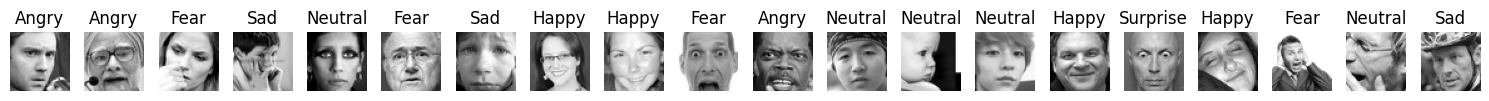

In [13]:
plt.figure(figsize=(15, 23))
for i in range(20):
    img = np.squeeze(X_train[i])  # Squeeze to remove any extra dimensions
    plt.subplot(1, 20, i + 1)
    plt.imshow(img, cmap='gray')  # Ensure grayscale display
    label = y_train[i]  # Since y_train has integer values like 3 (not one-hot encoded)
    plt.title(emotion_mapping[label])  # Map the integer label to emotion
    plt.axis('off')  # Turn off axis numbers
plt.tight_layout()
plt.show()

In [14]:
train_datagen=ImageDataGenerator( width_shift_range = 0.1, #shift the image width by 10%
                                 height_shift_range = 0.1, #shift the image height by 10%
                                 horizontal_flip = True, #flip the image horizontally
                                 zoom_range = 0.2) #zoom the images by 20%


valgen = ImageDataGenerator( width_shift_range = 0.1, #shift the image width by 10%
                               height_shift_range = 0.1, #shift the image height by 10%
                               horizontal_flip = True, #shift the image height by 10%
                               zoom_range = 0.2) #zoom the images by 20%
train_datagen.fit(X_train)
valgen.fit(X_val)

In [15]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=64)
validation_generator = valgen.flow(X_val, y_val, batch_size=64)

<function matplotlib.pyplot.show(close=None, block=None)>

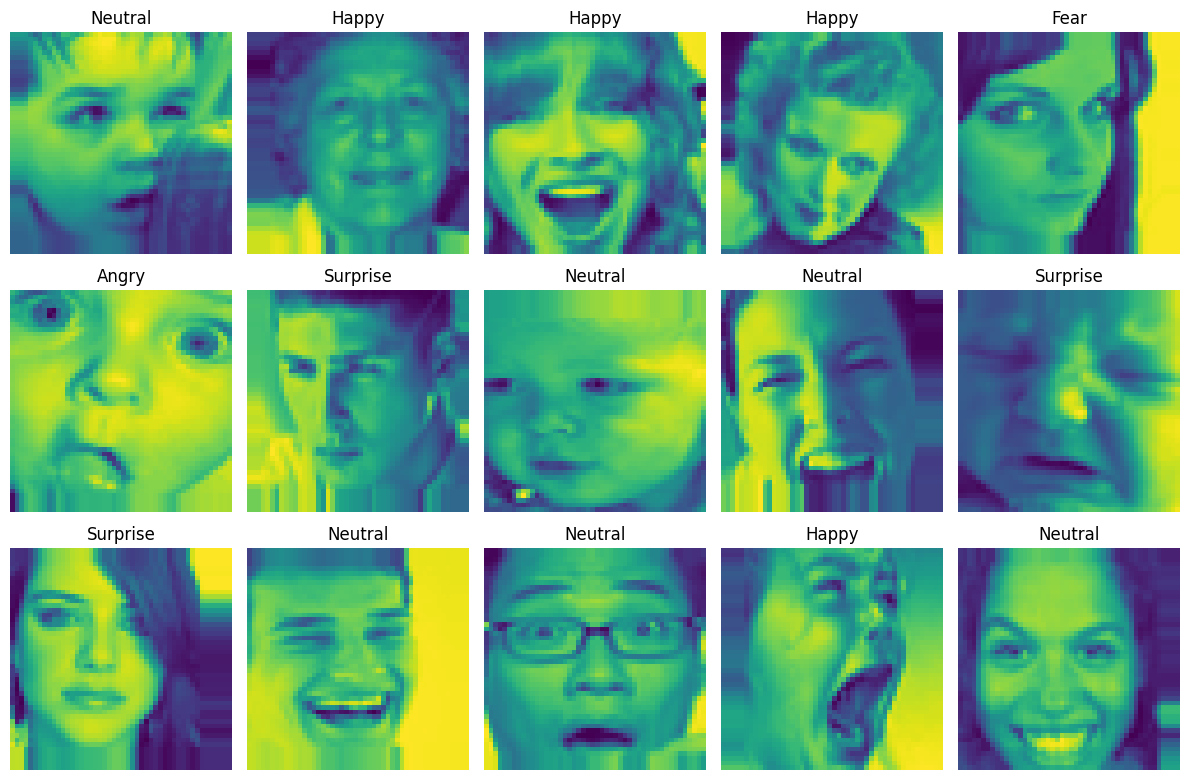

In [16]:
plt.figure(figsize=(12,8))
for i in range(0,15):
  plt.subplot(3,5,i+1)
  for X_batch , Y_batch in train_generator:
    images = X_batch[0]
    plt.imshow(images)
    index = Y_batch[i]
    plt.title(emotion_mapping[index])
    plt.axis('off') # turn off the axis numbering
    break
plt.tight_layout()
plt.show

In [16]:
input_shape=(48,48,1)
inputs = Input(shape=input_shape)

# Convolutional Layer 1
x = Conv2D(32, (3, 3), activation='relu')(inputs)  # Reduced filters
x = MaxPooling2D(pool_size=(2, 2))(x)  # Output: (23, 23, 32)

# Convolutional Layer 2
x = Conv2D(64, (3, 3), activation='relu')(x)  
x = MaxPooling2D(pool_size=(2, 2))(x)  # Output: (11, 11, 64)

# Convolutional Layer 3
x = Conv2D(128, (3, 3), activation='relu')(x) 

# Flatten the output for fully connected layers
x = Flatten()(x)  # Output: (11 * 11 * 128 = 15488)

# Fully Connected Layer 1
x = Dense(512, activation='relu')(x)  
x=Dropout(0.5)(x)  # Dropout for regularization

# Fully Connected Layer 2 (Output Layer)
outputs = Dense(7, activation='softmax')(x)

In [17]:
My_model=Model(inputs=inputs,outputs=outputs)

In [18]:
My_model.compile(optimizer="Adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
My_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,291,079 (16.37 MB)

 Trainable params: 4,291,079 (16.37 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
My_model.fit(
    train_generator,             # Training data generator
    epochs=50,                 # Number of epochs
    
    validation_data=validation_generator,   # Validation data generator
    
)

# Evaluating the model on the test set


Epoch 1/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 62s 135ms/step - accuracy: 0.5824 - loss: 1.0980 - val_accuracy: 0.5728 - val_loss: 1.1050
Epoch 2/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 61s 134ms/step - accuracy: 0.5907 - loss: 1.0827 - val_accuracy: 0.5675 - val_loss: 1.1367
Epoch 3/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 68s 150ms/step - accuracy: 0.5900 - loss: 1.0775 - val_accuracy: 0.5579 - val_loss: 1.1615
Epoch 4/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 64s 140ms/step - accuracy: 0.5885 - loss: 1.0926 - val_accuracy: 0.5786 - val_loss: 1.1314
Epoch 5/50
 29/455 ━━━━━━━━━━━━━━━━━━━━ 53s 125ms/step - accuracy: 0.5976 - loss: 1.0685

KeyboardInterrupt: 

In [ ]:
print(f"X_test shape is {X_test.shape} and Y_test shape is {y_test.shape}")

In [26]:
y_pred=My_model.predict(X_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


In [27]:
y_pred

array([[3.12707454e-01, 4.65981103e-02, 1.58891618e-01, ...,
        1.68090329e-01, 1.01801880e-01, 2.10730270e-01],
       [2.36826420e-01, 1.63650129e-03, 1.78478241e-01, ...,
        3.03268731e-01, 1.15541421e-01, 9.77861956e-02],
       [1.26550868e-01, 8.07124597e-04, 4.06198770e-01, ...,
        3.49572480e-01, 4.87045152e-03, 1.06363535e-01],
       ...,
       [3.07938643e-02, 7.90131744e-05, 1.48439869e-01, ...,
        3.89844328e-01, 3.91366370e-02, 3.06380898e-01],
       [3.34024608e-01, 8.05578893e-04, 2.19472535e-02, ...,
        6.08242415e-02, 7.99182057e-03, 1.36999441e-02],
       [3.85772213e-02, 3.20520456e-04, 4.17335451e-01, ...,
        3.99665087e-01, 3.78217199e-03, 1.39733061e-01]], dtype=float32)

In [28]:
y_pred_probs = tf.nn.softmax(y_pred)  # Convert logits to probabilities

# Get the predicted classes by taking the argmax along the classes axis
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Print the predicted classes
print("Predicted classes:", y_pred_classes)

Predicted classes: [0 4 2 ... 4 3 2]


In [29]:
correct_predictions = np.sum(y_pred_classes == y_test)

# Calculate accuracy
accuracy = correct_predictions / len(y_test)

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6147


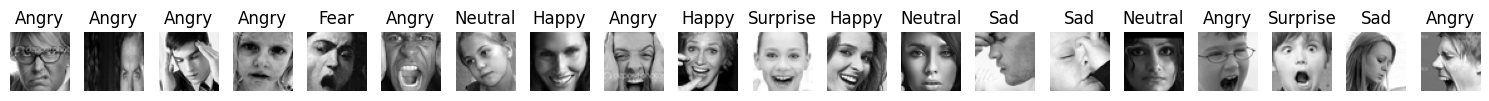

In [24]:
plt.figure(figsize=(15, 23))
for i in range(20):
    img = np.squeeze(X_test[i])  # Squeeze to remove any extra dimensions
    plt.subplot(1, 20, i + 1)
    plt.imshow(img, cmap='gray')  # Ensure grayscale display
    label = y_pred_classes[i]  # Since y_train has integer values like 3 (not one-hot encoded)
    plt.title(emotion_mapping[label])  # Map the integer label to emotion
    plt.axis('off')  # Turn off axis numbers
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

In [19]:
# Convert grayscale images (1 channel) to 3 channels by repeating the single channel
X_train_rgb = np.repeat(X_train, 3, axis=-1)
X_val_rgb = np.repeat(X_val, 3, axis=-1)
X_test_rgb = np.repeat(X_test, 3, axis=-1)

print(f"X_train shape: {X_train_rgb.shape}, X_val shape: {X_val_rgb.shape}, X_test shape: {X_test_rgb.shape}")




X_train shape: (29068, 48, 48, 3), X_val shape: (3230, 48, 48, 3), X_test shape: (3589, 48, 48, 3)


In [34]:
train_generator = train_datagen.flow(X_train_rgb, y_train, batch_size=64)
validation_generator = valgen.flow(X_val_rgb, y_val, batch_size=64)

# Load the VGG19 model pre-trained on ImageNet, excluding the top fully connected layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the VGG19 layers to prevent training them again
for layer in vgg_base.layers:
    layer.trainable = False

# Create a custom model on top of VGG19
x = vgg_base.output
x = GlobalAveragePooling2D()(x)  # Pool the feature maps
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout to prevent overfitting
output = Dense(7, activation='softmax')(x)  # 7 output classes for emotions

# Create the final model
vgg_model = Model(inputs=vgg_base.input, outputs=output)

# Compile the model
vgg_model.compile(optimizer=Adam(),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

# Print model summary
vgg_model.summary()




Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,290,631 (77.40 MB)

 Trainable params: 266,247 (1.02 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [35]:
vgg_model.fit(
    train_generator,             # Using the RGB images
    epochs=10,                   # Number of epochs
    validation_data=validation_generator,  # Validation on RGB images
)

Epoch 1/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 619s 1s/step - accuracy: 0.2815 - loss: 1.7893 - val_accuracy: 0.3319 - val_loss: 1.6758
Epoch 2/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 424s 930ms/step - accuracy: 0.3244 - loss: 1.6776 - val_accuracy: 0.3421 - val_loss: 1.6516
Epoch 3/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 374s 821ms/step - accuracy: 0.3338 - loss: 1.6638 - val_accuracy: 0.3437 - val_loss: 1.6477
Epoch 4/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 373s 817ms/step - accuracy: 0.3393 - loss: 1.6615 - val_accuracy: 0.3421 - val_loss: 1.6355
Epoch 5/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 374s 820ms/step - accuracy: 0.3476 - loss: 1.6445 - val_accuracy: 0.3511 - val_loss: 1.6384
Epoch 6/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 375s 822ms/step - accuracy: 0.3400 - loss: 1.6477 - val_accuracy: 0.3526 - val_loss: 1.6255
Epoch 7/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 374s 819ms/step - accuracy: 0.3560 - loss: 1.6267 - val_accuracy: 0.3604 - val_loss: 1.6250
Epoch 8/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 378s 828ms/step - accuracy: 0.3587 - lo

In [40]:
y_test.shape

(3589,)

In [41]:
X_test.shape

(3589, 48, 48, 1)

In [42]:
X_test_rgb.shape

(3589, 48, 48, 3)

In [44]:
# Check and convert data types
print(f"X_test_rgb dtype: {X_test_rgb.dtype}, y_test dtype: {y_test.dtype}")

# Ensure X_test_rgb is float32 (especially after normalization)
X_test_rgb = X_test_rgb.astype('float32')

# Ensure y_test is an integer type (int32 or int64)
y_test = y_test.astype('int32')

# Now evaluate the model
vgg_model.evaluate(X_test_rgb, y_test)


X_test_rgb dtype: float64, y_test dtype: int64
113/113 ━━━━━━━━━━━━━━━━━━━━ 43s 377ms/step - accuracy: 0.3719 - loss: 1.5590


[1.5616947412490845, 0.36918362975120544]

In [36]:
#ResNet

In [45]:
from tensorflow.keras.applications import ResNet50

# Load ResNet50 pre-trained on ImageNet, excluding the top layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the ResNet50 layers
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
x = resnet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)  # 7 output classes

# Create the final model
resnet_model = Model(inputs=resnet_base.input, outputs=output)

# Compile the model
resnet_model.compile(optimizer=Adam(),
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                     metrics=['accuracy'])

# Print model summary
resnet_model.summary()

# Fit the model
resnet_model.fit(
    train_generator,             # Using the RGB images
    epochs=10,                   # Number of epochs
    validation_data=validation_generator  # Validation on RGB images
)



Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 48, 48, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 54, 54, 3)         │               0 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 24, 24, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 24, 24, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 24, 24, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 26, 26, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 12, 12, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 12, 12, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 12, 12, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 12, 12, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 12, 12, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 12, 12, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 12, 12, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 12, 12, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 12, 12, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,640,391 (94.00 MB)

 Trainable params: 1,052,679 (4.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 212s 440ms/step - accuracy: 0.2264 - loss: 1.8907 - val_accuracy: 0.2492 - val_loss: 1.7970
Epoch 2/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 206s 452ms/step - accuracy: 0.2491 - loss: 1.8133 - val_accuracy: 0.2492 - val_loss: 1.7974
Epoch 3/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 205s 448ms/step - accuracy: 0.2515 - loss: 1.8095 - val_accuracy: 0.2486 - val_loss: 1.7915
Epoch 4/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 197s 432ms/step - accuracy: 0.2535 - loss: 1.8045 - val_accuracy: 0.2492 - val_loss: 1.7997
Epoch 5/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 195s 428ms/step - accuracy: 0.2558 - loss: 1.8007 - val_accuracy: 0.2492 - val_loss: 1.7914
Epoch 6/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 201s 439ms/step - accuracy: 0.2512 - loss: 1.8003 - val_accuracy: 0.2495 - val_loss: 1.7834
Epoch 7/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 201s 440ms/step - accuracy: 0.2567 - loss: 1.7929 - val_accuracy: 0.2548 - val_loss: 1.7793
Epoch 8/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 201s 440ms/step - accuracy: 0.2563 -

In [ ]:
# Evaluate the model on the test set
resnet_model.evaluate(X_test_rgb, y_test)

In [ ]:
#MobileNet

In [20]:
from tensorflow.keras.applications import MobileNetV2
train_generator = train_datagen.flow(X_train_rgb, y_train, batch_size=64)
validation_generator = valgen.flow(X_val_rgb, y_val, batch_size=64)
# Load MobileNetV2 pre-trained on ImageNet, excluding the top layers
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the MobileNetV2 layers
for layer in mobilenet_base.layers:
    layer.trainable = False

# Add custom layers on top of MobileNetV2
x = mobilenet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)  # 7 output classes

# Create the final model
mobilenet_model = Model(inputs=mobilenet_base.input, outputs=output)

# Compile the model
mobilenet_model.compile(optimizer=Adam(),
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                        metrics=['accuracy'])

# Print model summary
mobilenet_model.summary()

# Fit the model
mobilenet_model.fit(
    train_generator,             # Using the RGB images
    epochs=10,                   # Number of epochs
    validation_data=validation_generator  # Validation on RGB images
)


C:\Users\Mahika\AppData\Local\Temp\ipykernel_20560\1277162707.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 48, 48, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 24, 24, 32)        │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 24, 24, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 24, 24, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 24, 24, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 24, 24, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 24, 24, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 24, 24, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 24, 24, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 24, 24, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 24, 24, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 24, 24, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 25, 25, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 12, 12, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,917,447 (11.13 MB)

 Trainable params: 659,463 (2.52 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10


C:\Users\Mahika\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


455/455 ━━━━━━━━━━━━━━━━━━━━ 90s 176ms/step - accuracy: 0.2762 - loss: 1.8876 - val_accuracy: 0.3421 - val_loss: 1.6488
Epoch 2/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 75s 163ms/step - accuracy: 0.3315 - loss: 1.6797 - val_accuracy: 0.3384 - val_loss: 1.6467
Epoch 3/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 75s 163ms/step - accuracy: 0.3348 - loss: 1.6627 - val_accuracy: 0.3480 - val_loss: 1.6248
Epoch 4/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 115s 251ms/step - accuracy: 0.3468 - loss: 1.6479 - val_accuracy: 0.3638 - val_loss: 1.6082
Epoch 5/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 112s 244ms/step - accuracy: 0.3488 - loss: 1.6388 - val_accuracy: 0.3607 - val_loss: 1.6158
Epoch 6/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 111s 243ms/step - accuracy: 0.3570 - loss: 1.6285 - val_accuracy: 0.3576 - val_loss: 1.6157
Epoch 7/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 100s 219ms/step - accuracy: 0.3509 - loss: 1.6275 - val_accuracy: 0.3616 - val_loss: 1.6059
Epoch 8/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 101s 220ms/step - accuracy: 0.3608 - loss: 1.6138 

In [22]:
# Evaluate the model on the test set

print(f"X_test_rgb dtype: {X_test_rgb.dtype}, y_test dtype: {y_test.dtype}")

# Ensure X_test_rgb is float32 (especially after normalization)
X_test_rgb = X_test_rgb.astype('float32')

# Ensure y_test is an integer type (int32 or int64)
y_test = y_test.astype('int32')

mobilenet_model.evaluate(X_test_rgb, y_test)


X_test_rgb dtype: float64, y_test dtype: int64
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.3834 - loss: 1.5809


[1.5760035514831543, 0.3814432919025421]